# Introduction

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet
0,the _ûndër-ratèd niggáh👊🏾,NaN,@ManUtd die hard❤️❤️💪🏿💪🏿\n\n\nYOLO\n\n\nJ'ai b...,2019-09-06 19:24:57+00:00,581,1035,8922,False,2021-10-06 12:05:38+00:00,When life hits and the same time poverty strik...,Twitter for Android,False
1,Best uncle on planet earth,NaN,NaN,2013-05-08 19:35:26+00:00,741,730,8432,False,2021-10-06 12:05:22+00:00,That marble episode of #SquidGame ruined me. 😭😭😭,Twitter for Android,False
2,marcie,NaN,animal crossing. chicken nuggets. baby yoda. s...,2009-02-21 10:31:30+00:00,562,1197,62732,False,2021-10-06 12:05:22+00:00,#Squidgame time,Twitter Web App,False
3,YoMo.Mdp,Any pronouns,Where the heck is the karma\nI'm going on my s...,2021-02-14 13:21:22+00:00,3,277,1341,False,2021-10-06 12:05:04+00:00,//Blood on 1st slide\nI'm joining the squidgam...,Twitter Web App,False
4,Laura Reactions,France,I talk and I make reactions videos about shows...,2018-12-19 20:38:28+00:00,330,152,2278,False,2021-10-06 12:05:00+00:00,"The two first games, players were killed by th...",Twitter Web App,False


In [4]:
df.tail()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet
80014,Sale X Low,USA,"Sale X Low, the cheapest low price online stor...",2021-04-03 20:49:35+00:00,12,49,7,False,2021-10-28 13:46:26+00:00,Yes Yes Yes\n\n@ArianaGrande\n#Squidgame\n htt...,SocialRabbit Plugin,False
80015,RevAAA,NaN,Review Anything Anyone Anywhere,2010-11-24 21:48:53+00:00,6907,0,0,False,2021-10-28 13:45:38+00:00,SQUID GAME was reviewed on RevAAA #squidgame \...,Twitter for iPhone,False
80016,Omo K-Pop News,NaN,OMO K-Pop\nNews and Updates,2021-09-22 12:01:24+00:00,152,807,593,False,2021-10-28 13:45:00+00:00,Back &amp; Forth Between ‘Squid Game’ Creator ...,Twitter Web App,False
80017,🎃Pumpkin💀Queen 🕸,Halloweentown 🎃,Creator of Stuff | Horror fan | Traveler | Bad...,2009-02-19 17:09:28+00:00,8048,8822,68980,False,2021-10-28 13:44:57+00:00,So what sort of games do you think they'll pla...,Twitter for Android,False
80018,levi do lay,NaN,NaN,2020-06-17 11:55:56+00:00,16310,14368,108325,False,2021-10-28 13:44:38+00:00,@venancio_taylor @tracklist cala a boca swifte...,Twitter for iPhone,False


# Task

. Text preprocessing
. Sentiment Analysis
. Keyword Extraction
. Entity Extraction

In [102]:
df.shape

(80019, 12)

The data contains 80019 rows and 12 columns

In [5]:
df.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'source', 'is_retweet'],
      dtype='object')

In [7]:
df.describe()

,user_followers,user_friends,user_favourites
count,8.001900e+04,8.001900e+04,8.001900e+04
mean,1.794587e+04,1.071020e+03,1.796449e+04
std,2.451159e+05,6.751348e+03,4.850358e+04
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.200000e+01,1.180000e+02,4.420000e+02
50%,2.910000e+02,3.930000e+02,3.028000e+03
75%,1.183000e+03,9.860000e+02,1.494000e+04
max,1.684642e+07,1.211576e+06,1.144792e+06


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80019 entries, 0 to 80018
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         80015 non-null  object
 1   user_location     56149 non-null  object
 2   user_description  74808 non-null  object
 3   user_created      80019 non-null  object
 4   user_followers    80019 non-null  int64 
 5   user_friends      80019 non-null  int64 
 6   user_favourites   80019 non-null  int64 
 7   user_verified     80019 non-null  bool  
 8   date              80019 non-null  object
 9   text              80019 non-null  object
 10  source            80019 non-null  object
 11  is_retweet        80019 non-null  bool  
dtypes: bool(2), int64(3), object(7)
memory usage: 6.3+ MB


In [9]:
df.isnull().sum()

user_name               4
user_location       23870
user_description     5211
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
source                  0
is_retweet              0
dtype: int64

In [10]:
df1=df.copy()

In [11]:
df1.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet
0,the _ûndër-ratèd niggáh👊🏾,NaN,@ManUtd die hard❤️❤️💪🏿💪🏿\n\n\nYOLO\n\n\nJ'ai b...,2019-09-06 19:24:57+00:00,581,1035,8922,False,2021-10-06 12:05:38+00:00,When life hits and the same time poverty strik...,Twitter for Android,False
1,Best uncle on planet earth,NaN,NaN,2013-05-08 19:35:26+00:00,741,730,8432,False,2021-10-06 12:05:22+00:00,That marble episode of #SquidGame ruined me. 😭😭😭,Twitter for Android,False
2,marcie,NaN,animal crossing. chicken nuggets. baby yoda. s...,2009-02-21 10:31:30+00:00,562,1197,62732,False,2021-10-06 12:05:22+00:00,#Squidgame time,Twitter Web App,False
3,YoMo.Mdp,Any pronouns,Where the heck is the karma\nI'm going on my s...,2021-02-14 13:21:22+00:00,3,277,1341,False,2021-10-06 12:05:04+00:00,//Blood on 1st slide\nI'm joining the squidgam...,Twitter Web App,False
4,Laura Reactions,France,I talk and I make reactions videos about shows...,2018-12-19 20:38:28+00:00,330,152,2278,False,2021-10-06 12:05:00+00:00,"The two first games, players were killed by th...",Twitter Web App,False


In [12]:
df1 = df.dropna()

In [13]:
df1.isnull().sum()

user_name           0
user_location       0
user_description    0
user_created        0
user_followers      0
user_friends        0
user_favourites     0
user_verified       0
date                0
text                0
source              0
is_retweet          0
dtype: int64

In [14]:
df1 = df1.replace({True: 1, False:0})
df1.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet
3,YoMo.Mdp,Any pronouns,Where the heck is the karma\nI'm going on my s...,2021-02-14 13:21:22+00:00,3,277,1341,0,2021-10-06 12:05:04+00:00,//Blood on 1st slide\nI'm joining the squidgam...,Twitter Web App,0
4,Laura Reactions,France,I talk and I make reactions videos about shows...,2018-12-19 20:38:28+00:00,330,152,2278,0,2021-10-06 12:05:00+00:00,"The two first games, players were killed by th...",Twitter Web App,0
5,Peyman 🅚🅐🅘,United Kingdom,Official @KardiaChain $KAI Ambassador\nMarketi...,2018-01-27 12:07:31+00:00,546,318,6265,0,2021-10-06 12:04:54+00:00,$THG\nGoing to explode to 4B Marketcap very so...,Twitter for Android,0
7,BarBiE Fábregas 🇿🇦,South Africa,Legal Administrator👩🏾‍💻|Soccer Fanatic⚽️ #Dail...,2011-03-28 18:56:28+00:00,1877,2057,33186,0,2021-10-06 12:04:26+00:00,Please vote in my daily poll. \nThanks. 😊\n\nD...,Twitter for iPhone,0
9,Kevin Franco,"Calgary, Canada",When it comes to describing myself in a one li...,2009-05-11 20:14:51+00:00,1027,278,20902,0,2021-10-06 12:04:10+00:00,I discovered English audio after 5 episodes of...,Twitter Web App,0


In [15]:
df1.isnull()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
80007,False,False,False,False,False,False,False,False,False,False,False,False
80009,False,False,False,False,False,False,False,False,False,False,False,False
80013,False,False,False,False,False,False,False,False,False,False,False,False
80014,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
df1.duplicated().sum()

231

In [17]:
df1= df1.drop_duplicates()

In [18]:
df1.duplicated().sum()

0

In [19]:
df1['user_location'].unique()

array(['Any pronouns ', 'France', 'United Kingdom', ..., 'Cabangbungin',
       "ehyphen 's heart ", 'Murcia Spain'], dtype=object)

In [20]:
df1['user_verified'].unique()
df1['is_retweet'].unique()

array([0], dtype=int64)

In [21]:
import datetime

In [22]:
df1['year'] = pd.DatetimeIndex(df1['date']).year
df1['month'] = pd.DatetimeIndex(df1['date']).month_name()
df1['Day'] = pd.DatetimeIndex(df1['date']).day_name()
df1.head(4)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet,year,month,Day
3,YoMo.Mdp,Any pronouns,Where the heck is the karma\nI'm going on my s...,2021-02-14 13:21:22+00:00,3,277,1341,0,2021-10-06 12:05:04+00:00,//Blood on 1st slide\nI'm joining the squidgam...,Twitter Web App,0,2021,October,Wednesday
4,Laura Reactions,France,I talk and I make reactions videos about shows...,2018-12-19 20:38:28+00:00,330,152,2278,0,2021-10-06 12:05:00+00:00,"The two first games, players were killed by th...",Twitter Web App,0,2021,October,Wednesday
5,Peyman 🅚🅐🅘,United Kingdom,Official @KardiaChain $KAI Ambassador\nMarketi...,2018-01-27 12:07:31+00:00,546,318,6265,0,2021-10-06 12:04:54+00:00,$THG\nGoing to explode to 4B Marketcap very so...,Twitter for Android,0,2021,October,Wednesday
7,BarBiE Fábregas 🇿🇦,South Africa,Legal Administrator👩🏾‍💻|Soccer Fanatic⚽️ #Dail...,2011-03-28 18:56:28+00:00,1877,2057,33186,0,2021-10-06 12:04:26+00:00,Please vote in my daily poll. \nThanks. 😊\n\nD...,Twitter for iPhone,0,2021,October,Wednesday


In [23]:
df1['year'].unique()

array([2021], dtype=int64)

In [24]:
df1['month'].unique()

array(['October', 'November'], dtype=object)

In [25]:
df1['Day'].unique()

array(['Wednesday', 'Tuesday', 'Thursday', 'Monday', 'Sunday', 'Saturday',
       'Friday'], dtype=object)

In [26]:
df1.user_location.unique()

array(['Any pronouns ', 'France', 'United Kingdom', ..., 'Cabangbungin',
       "ehyphen 's heart ", 'Murcia Spain'], dtype=object)

In [27]:
df1.source.unique()

array(['Twitter Web App', 'Twitter for Android', 'Twitter for iPhone',
       'Twitter for iPad', 'PromoRepublic', 'TweetDeck', 'Instagram',
       'Sprout Social', 'Tweetbot for iΟS', 'dlvr.it', 'Hootsuite Inc.',
       'Meltwater Social', 'Twitter for Mac', 'Buffer',
       'SocialHub by maloon', 'Emplifi', 'Agorapulse app', 'Zoho Social',
       'SocialFlow', 'Blog2Social APP', 'Twitter for Advertisers',
       'Metricool', 'Sprinklr', 'IFTTT', 'Twitter Media Studio',
       'Echobox', 'Libsyn On-Publish', 'Echofon', 'Twitterrific for iOS',
       'LaterMedia', 'Streamlabs Twitter', 'CoSchedule', 'Hypefury',
       'Twitter for  iPhone', 'Nintendo Switch Share', 'Tweetlogix',
       'TweetCaster for Android', 'TwitPane for Android',
       'Vero - True Social', 'TheWrap', 'popsugar.com', 'Fenix 2',
       'Loomly', 'Spreaker', 'Sprinklr Publishing', 'PlayStation®Network',
       'Sendible', "lucy's microwave", 'iHeartMedia Publishing',
       'SocialBee.io v2', 'HeyOrca', 'Falcon So

In [28]:
df1.source.nunique()

212

In [105]:
df1['source'].value_counts().nlargest(30)

Twitter for iPhone       22260
Twitter for Android      15430
Twitter Web App          10675
Twitter for iPad          1011
TweetDeck                 1002
Instagram                  572
SocialRabbit Plugin        395
Hootsuite Inc.             340
Buffer                     305
dlvr.it                    150
Revive Social App          141
Sprout Social              119
IFTTT                       95
LaterMedia                  87
Twitter Media Studio        79
Tweetbot for iΟS            74
WordPress.com               72
SocialFlow                  65
lucy's microwave            49
Zoho Social                 45
Echobox                     40
Twitter for Mac             38
Agorapulse app              38
Nintendo Switch Share       35
HubSpot                     32
Emplifi                     32
popsugar.com                29
SocialBee.io v2             28
Loomly                      26
Zapier.com                  26
Name: source, dtype: int64

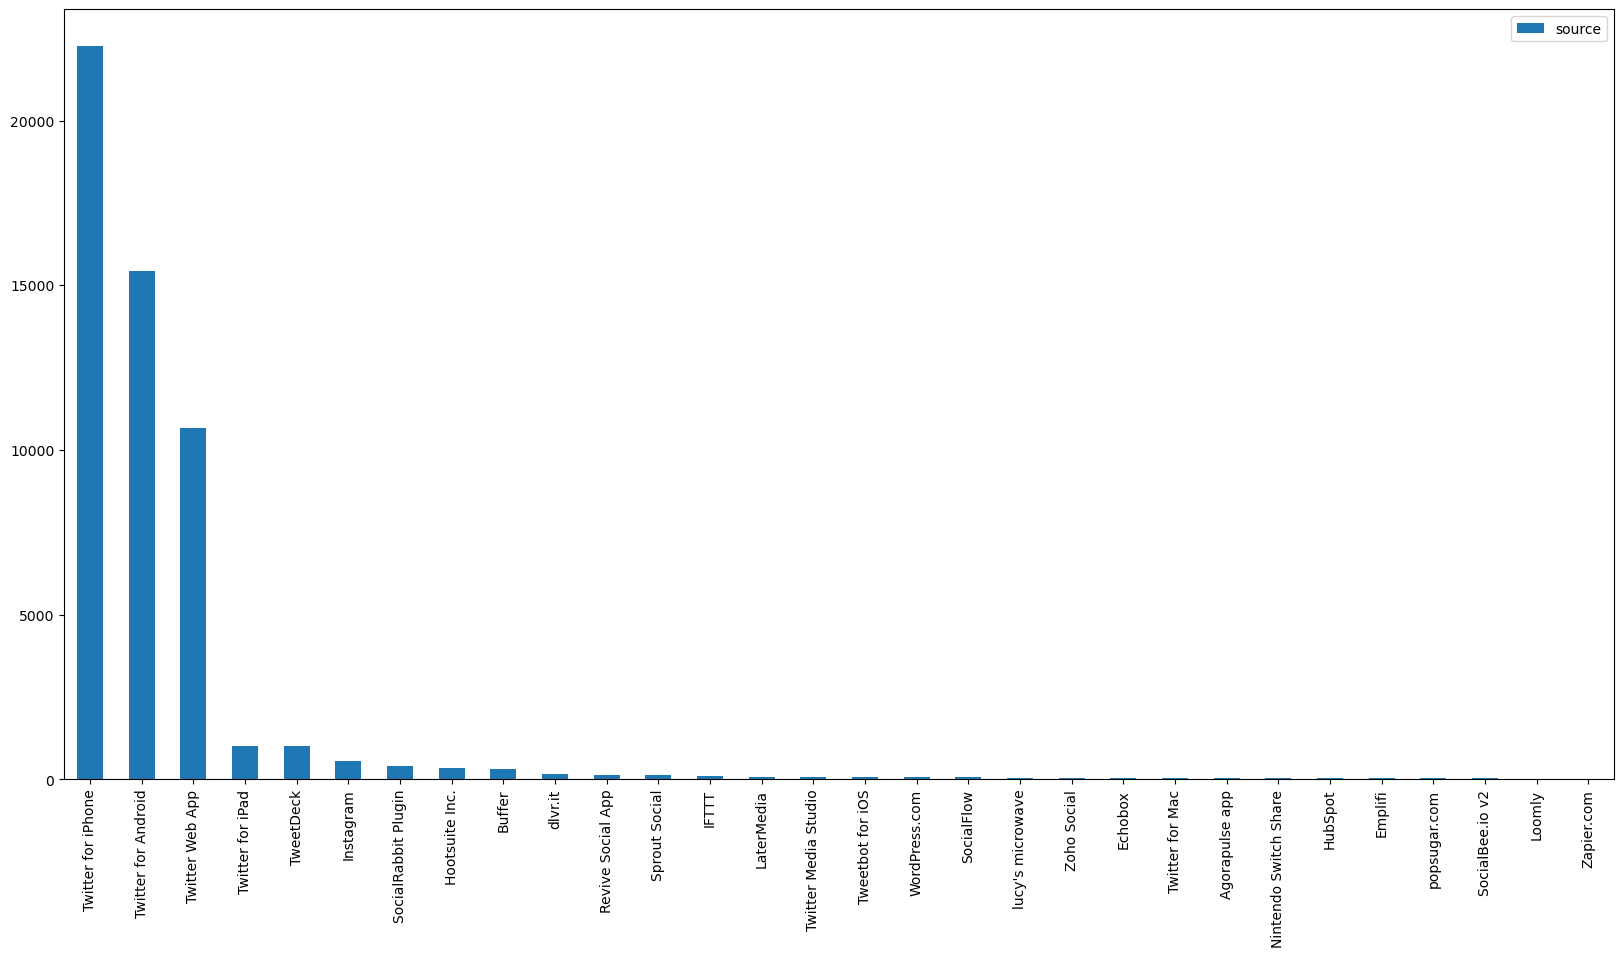

In [109]:
#plot the top value_counts
plt.figure(figsize=(20,10))
df1['source'].value_counts().nlargest(30).plot(kind='bar')
plt.xticks(rotation= 90)
plt.legend()
plt.show()

In [31]:
# value counts for user_verified 
# knowing the numbers of users that are verified vs none verified
df['user_verified'].value_counts()

False    76718
True      3301
Name: user_verified, dtype: int64

Text(0.5, 0, 'non_verified-----------------------------user_verified')

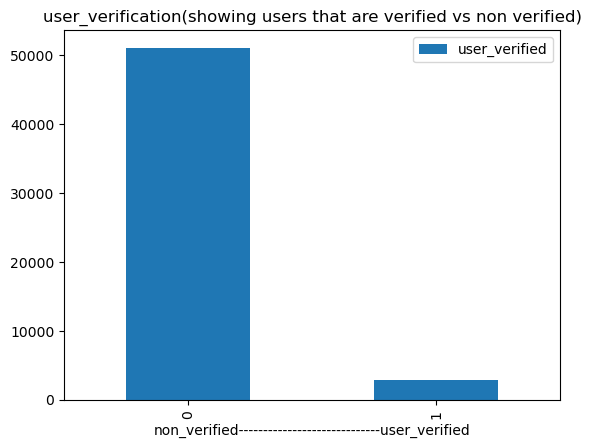

In [32]:
df1['user_verified'].value_counts().plot(kind='bar')
plt.legend()
plt.title("user_verification(showing users that are verified vs non verified)")
plt.xlabel("non_verified-----------------------------user_verified")

In [38]:
df1['user_location'].value_counts().nlargest(10)

Los Angeles, CA                865
London, England                677
United States                  662
India                          655
USA                            623
London                         537
United Kingdom                 515
New York, NY                   377
Canada                         357
Dubai, United Arab Emirates    330
Name: user_location, dtype: int64

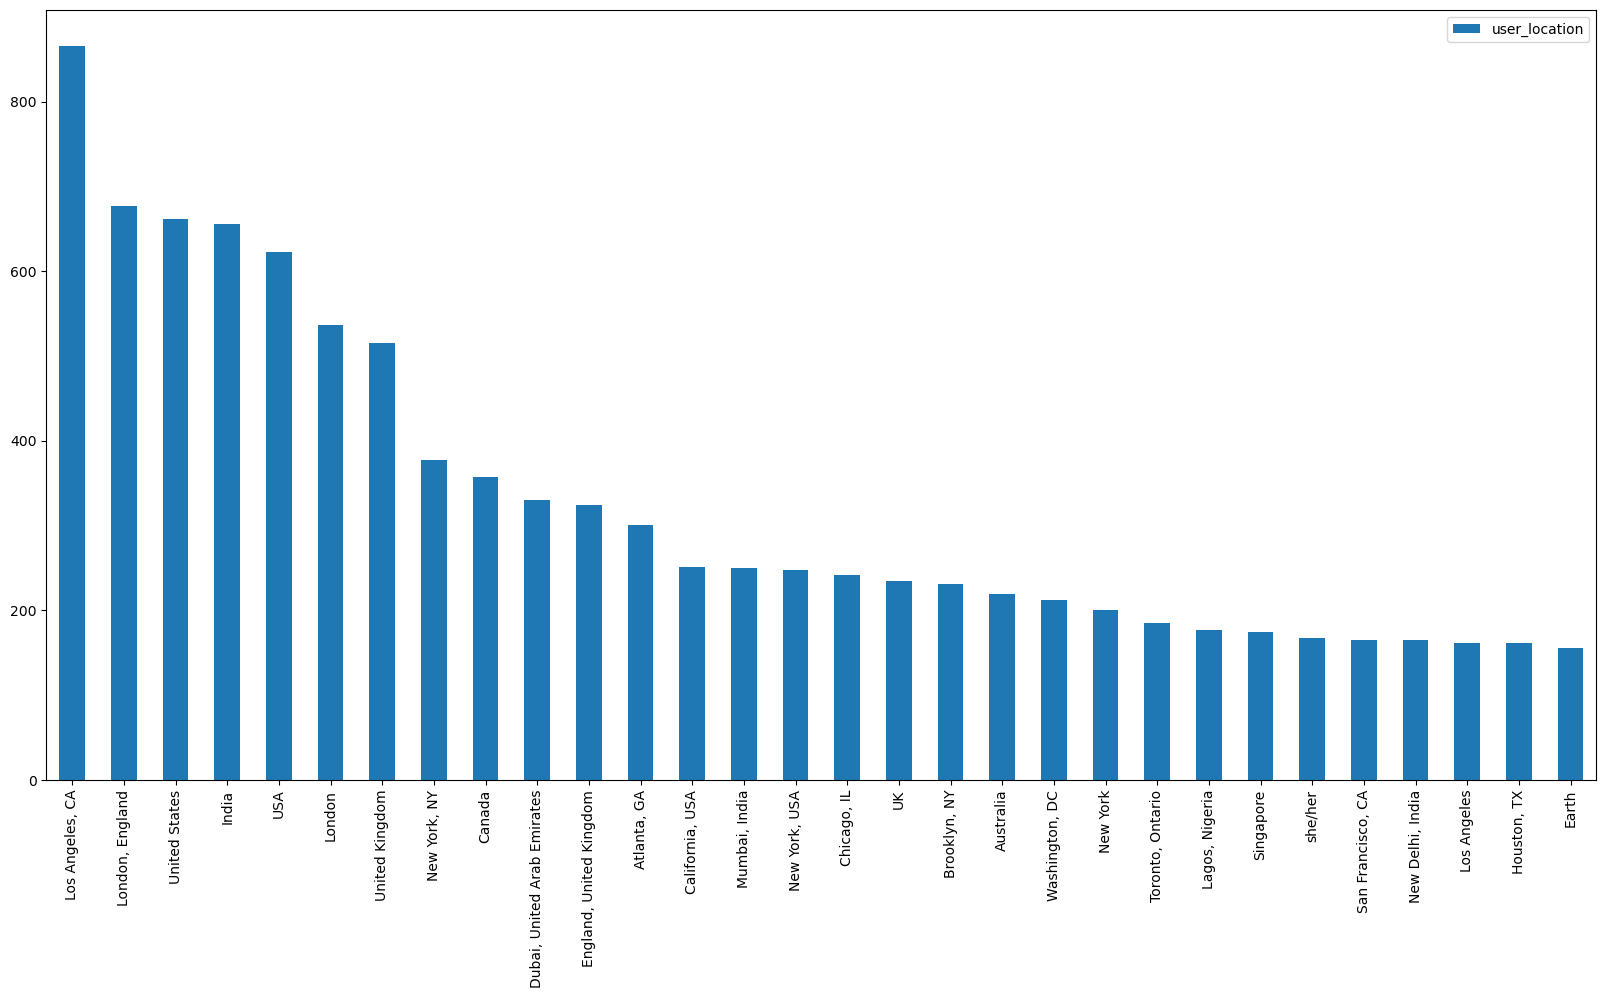

In [39]:
#plot the top value_counts
plt.figure(figsize=(20,10))
df1['user_location'].value_counts().nlargest(30).plot(kind='bar')
plt.xticks()
plt.legend()
plt.show()

In [43]:
# What city has the highest number of user_followers, user_friends, user_favourites

In [44]:
dfcs = df1.groupby("user_location").sum()
dfcs.sort_values("user_followers", ascending = False , inplace = True)
dfcs.head(10)

,user_followers,user_friends,user_favourites,user_verified,is_retweet,year
user_location,,,,,,
India,204310003,357775,6038253,110,0,1323755
Back in Studio 6B!,62123849,293427,1955392,14,0,28294
"New York, NY",59267868,549579,9005185,76,0,761917
Universe,50541785,2623,91733,3,0,24252
Worldwide,48194121,171411,730692,28,0,274856
London,46096560,1359214,8266816,116,0,1085277
New York,40800828,502210,2763261,57,0,404200
"Los Angeles, CA",39415278,2521293,17374963,119,0,1748165
"Hollywood, CA",37229810,161089,304048,23,0,56588


# Text Analysis

In [45]:
import neattext.functions as nfx

In [46]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [110]:
df1['text']

3        //Blood on 1st slide\nI'm joining the squidgam...
4        The two first games, players were killed by th...
5        $THG\nGoing to explode to 4B Marketcap very so...
7        Please vote in my daily poll. \nThanks. 😊\n\nD...
9        I discovered English audio after 5 episodes of...
                               ...                        
80007                       #PCAs I vote #SquidGame for it
80009    #FrenchMontana claps back at his viral #SquidG...
80013    Eeagle-eyed viewers of the #SquidGame have com...
80014    Yes Yes Yes\n\n@ArianaGrande\n#Squidgame\n htt...
80017    So what sort of games do you think they'll pla...
Name: text, Length: 54036, dtype: object

# Noise to remove

 #remove all mentions
 #remove hashtags
 #url
 #emojis
 #special characters

In [111]:
df1.head(3)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet,year,month,Day,clean_tweet,sentiment_results,Polarity,subjectivity,sentiment
3,YoMo.Mdp,Any pronouns,Where the heck is the karma\nI'm going on my s...,2021-02-14 13:21:22+00:00,3,277,1341,0,2021-10-06 12:05:04+00:00,//Blood on 1st slide\nI'm joining the squidgam...,Twitter Web App,0,2021,October,Wednesday,//Blood on 1st slide\nIm joining the squidgame...,"{'Polarity': -0.2, 'subjectivity': 0.4, 'senti...",0.100,0.100,Positive
4,Laura Reactions,France,I talk and I make reactions videos about shows...,2018-12-19 20:38:28+00:00,330,152,2278,0,2021-10-06 12:05:00+00:00,"The two first games, players were killed by th...",Twitter Web App,0,2021,October,Wednesday,The two first games players were killed by the...,"{'Polarity': -0.22499999999999998, 'subjectivi...",-0.175,0.175,Negative
5,Peyman 🅚🅐🅘,United Kingdom,Official @KardiaChain $KAI Ambassador\nMarketi...,2018-01-27 12:07:31+00:00,546,318,6265,0,2021-10-06 12:04:54+00:00,$THG\nGoing to explode to 4B Marketcap very so...,Twitter for Android,0,2021,October,Wednesday,$THG\nGoing to explode to 4B Marketcap very so...,"{'Polarity': 0.016666666666666663, 'subjectivi...",0.260,0.390,Positive


 Since there is no hashtags column, we are going to extract the hashtags from texts

In [49]:
df1['text'].apply(nfx.extract_hashtags)

3                                            [#SquidGame…]
4                                                       []
5                                                       []
7                                                       []
9                                                       []
                               ...                        
80007                                  [#PCAs, #SquidGame]
80009                         [#FrenchMontana, #SquidGame]
80013                                         [#SquidGame]
80014    [#Squidgame, #Outerwear, #Product, #Neck, #Sle...
80017         [#SquidGame, #squidgamenetflix, #SquidGames]
Name: text, Length: 54036, dtype: object

In [50]:
#cleaning of the text by removing the hashtags
df1['clean_tweet'] = df1['text'].apply(nfx.remove_hashtags)

In [51]:
df1[['text', 'clean_tweet']]

,text,clean_tweet
3,//Blood on 1st slide\nI'm joining the squidgam...,//Blood on 1st slide\nI'm joining the squidgam...
4,"The two first games, players were killed by th...","The two first games, players were killed by th..."
5,$THG\nGoing to explode to 4B Marketcap very so...,$THG\nGoing to explode to 4B Marketcap very so...
7,Please vote in my daily poll. \nThanks. 😊\n\nD...,Please vote in my daily poll. \nThanks. 😊\n\nD...
9,I discovered English audio after 5 episodes of...,I discovered English audio after 5 episodes of...
...,...,...
80007,#PCAs I vote #SquidGame for it,I vote for it
80009,#FrenchMontana claps back at his viral #SquidG...,claps back at his viral meme\nhttps://t.co...
80013,Eeagle-eyed viewers of the #SquidGame have com...,Eeagle-eyed viewers of the have come togethe...
80014,Yes Yes Yes\n\n@ArianaGrande\n#Squidgame\n htt...,Yes Yes Yes\n\n@ArianaGrande\n \n https://t.co...


In [115]:
# removing mentions
df1['clean_tweet'] = df1['clean_tweet'].apply(lambda x: nfx.remove_userhandles(x))

In [53]:
df1[['text','clean_tweet']]

,text,clean_tweet
3,//Blood on 1st slide\nI'm joining the squidgam...,//Blood on 1st slide\nI'm joining the squidgam...
4,"The two first games, players were killed by th...","The two first games, players were killed by th..."
5,$THG\nGoing to explode to 4B Marketcap very so...,$THG\nGoing to explode to 4B Marketcap very so...
7,Please vote in my daily poll. \nThanks. 😊\n\nD...,Please vote in my daily poll. \nThanks. 😊\n\nD...
9,I discovered English audio after 5 episodes of...,I discovered English audio after 5 episodes of...
...,...,...
80007,#PCAs I vote #SquidGame for it,I vote for it
80009,#FrenchMontana claps back at his viral #SquidG...,claps back at his viral meme\nhttps://t.co...
80013,Eeagle-eyed viewers of the #SquidGame have com...,Eeagle-eyed viewers of the have come togethe...
80014,Yes Yes Yes\n\n@ArianaGrande\n#Squidgame\n htt...,Yes Yes Yes\n\n \n \n https://t.co/BQgwd91ODK ...


In [54]:
df1['text'].apply(nfx.extract_urls)

3                                [https://t.co/N4UGv9hxx8]
4                                [https://t.co/Qf057XDJ7C]
5                                [https://t.co/4Y2bO088JM]
7                                [https://t.co/9CnadB5iYo]
9                                [https://t.co/5oMJ0KBXqL]
                               ...                        
80007                                                   []
80009    [https://t.co/YHcKq3CWVQ, https://t.co/YHcKq3C...
80013                            [https://t.co/luddA9W3Io]
80014    [https://t.co/BQgwd91ODK, https://t.co/qoJvutH...
80017                                                   []
Name: text, Length: 54036, dtype: object

In [55]:
#remove multiple_spaces
df1['clean_tweet'] = df1['clean_tweet'].apply(nfx.remove_multiple_spaces)

In [56]:
df1['clean_tweet'].loc[7]

'Please vote in my daily poll. Thanks. 😊 Do you think Donny van de Beek should leave Manchester United?\nYes OR No?… https://t.co/9CnadB5iYo'

In [57]:
#remove all urls
df1['clean_tweet'] = df1['clean_tweet'].apply(nfx.remove_urls)

In [58]:
#remove punctuations
df1['clean_tweet'] = df1['clean_tweet'].apply(nfx.remove_puncts)

In [59]:
# remove_emojis
df1['clean_tweet'] = df1['clean_tweet'].apply(nfx.remove_emojis)

In [60]:
df1[['text','clean_tweet']]

,text,clean_tweet
3,//Blood on 1st slide\nI'm joining the squidgam...,//Blood on 1st slide\nIm joining the squidgame...
4,"The two first games, players were killed by th...",The two first games players were killed by the...
5,$THG\nGoing to explode to 4B Marketcap very so...,$THG\nGoing to explode to 4B Marketcap very so...
7,Please vote in my daily poll. \nThanks. 😊\n\nD...,Please vote in my daily poll Thanks Do you th...
9,I discovered English audio after 5 episodes of...,I discovered English audio after 5 episodes of...
...,...,...
80007,#PCAs I vote #SquidGame for it,I vote for it
80009,#FrenchMontana claps back at his viral #SquidG...,claps back at his viral meme\n
80013,Eeagle-eyed viewers of the #SquidGame have com...,Eeagleeyed viewers of the have come together o...
80014,Yes Yes Yes\n\n@ArianaGrande\n#Squidgame\n htt...,Yes Yes Yes


# Sentiment Analysis

In [61]:
from textblob import TextBlob

In [62]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    result = {'Polarity':sentiment_polarity,
              'subjectivity':sentiment_subjectivity,
              'sentiment':sentiment_label}
    return result

    positive = percentage(positive, noOfTweet)
    negative = percentage(negative, noOfTweet)
    neutral = percentage(neutral, noOfTweet)
    

In [116]:
# Text
fx1 =df1['clean_tweet'].iloc[0]

In [117]:
get_sentiment(fx1)

{'Polarity': -0.2, 'subjectivity': 0.4, 'sentiment': 'Negative'}

In [65]:
df1['sentiment_results'] = df1['clean_tweet'].apply(get_sentiment) 

In [66]:
df1['sentiment_results']

3        {'Polarity': -0.2, 'subjectivity': 0.4, 'senti...
4        {'Polarity': -0.22499999999999998, 'subjectivi...
5        {'Polarity': 0.016666666666666663, 'subjectivi...
7        {'Polarity': 0.1, 'subjectivity': 0.1, 'sentim...
9        {'Polarity': -0.17500000000000002, 'subjectivi...
                               ...                        
80007    {'Polarity': 0.0, 'subjectivity': 0.0, 'sentim...
80009    {'Polarity': 0.0, 'subjectivity': 0.0, 'sentim...
80013    {'Polarity': 0.5, 'subjectivity': 1.0, 'sentim...
80014    {'Polarity': 0.0, 'subjectivity': 0.0, 'sentim...
80017    {'Polarity': 0.0, 'subjectivity': 1.0, 'sentim...
Name: sentiment_results, Length: 54036, dtype: object

In [67]:
#to split into individual component
df1['sentiment_results'].iloc[7]

{'Polarity': 0.4, 'subjectivity': 0.7, 'sentiment': 'Positive'}

In [68]:
pd.json_normalize(df1['sentiment_results'].iloc[0])

,Polarity,subjectivity,sentiment
0,-0.2,0.4,Negative


In [69]:
df1 = df1.join(pd.json_normalize(df1['sentiment_results']))

In [70]:
df1.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet,year,month,Day,clean_tweet,sentiment_results,Polarity,subjectivity,sentiment
3,YoMo.Mdp,Any pronouns,Where the heck is the karma\nI'm going on my s...,2021-02-14 13:21:22+00:00,3,277,1341,0,2021-10-06 12:05:04+00:00,//Blood on 1st slide\nI'm joining the squidgam...,Twitter Web App,0,2021,October,Wednesday,//Blood on 1st slide\nIm joining the squidgame...,"{'Polarity': -0.2, 'subjectivity': 0.4, 'senti...",0.100,0.100,Positive
4,Laura Reactions,France,I talk and I make reactions videos about shows...,2018-12-19 20:38:28+00:00,330,152,2278,0,2021-10-06 12:05:00+00:00,"The two first games, players were killed by th...",Twitter Web App,0,2021,October,Wednesday,The two first games players were killed by the...,"{'Polarity': -0.22499999999999998, 'subjectivi...",-0.175,0.175,Negative
5,Peyman 🅚🅐🅘,United Kingdom,Official @KardiaChain $KAI Ambassador\nMarketi...,2018-01-27 12:07:31+00:00,546,318,6265,0,2021-10-06 12:04:54+00:00,$THG\nGoing to explode to 4B Marketcap very so...,Twitter for Android,0,2021,October,Wednesday,$THG\nGoing to explode to 4B Marketcap very so...,"{'Polarity': 0.016666666666666663, 'subjectivi...",0.260,0.390,Positive
7,BarBiE Fábregas 🇿🇦,South Africa,Legal Administrator👩🏾‍💻|Soccer Fanatic⚽️ #Dail...,2011-03-28 18:56:28+00:00,1877,2057,33186,0,2021-10-06 12:04:26+00:00,Please vote in my daily poll. \nThanks. 😊\n\nD...,Twitter for iPhone,0,2021,October,Wednesday,Please vote in my daily poll Thanks Do you th...,"{'Polarity': 0.1, 'subjectivity': 0.1, 'sentim...",0.400,0.700,Positive
9,Kevin Franco,"Calgary, Canada",When it comes to describing myself in a one li...,2009-05-11 20:14:51+00:00,1027,278,20902,0,2021-10-06 12:04:10+00:00,I discovered English audio after 5 episodes of...,Twitter Web App,0,2021,October,Wednesday,I discovered English audio after 5 episodes of...,"{'Polarity': -0.17500000000000002, 'subjectivi...",-0.300,0.450,Negative


In [71]:
#getting the valuecounts of the result
df1['sentiment'].value_counts()

Positive    13844
Neutral     13812
Negative     9315
Name: sentiment, dtype: int64

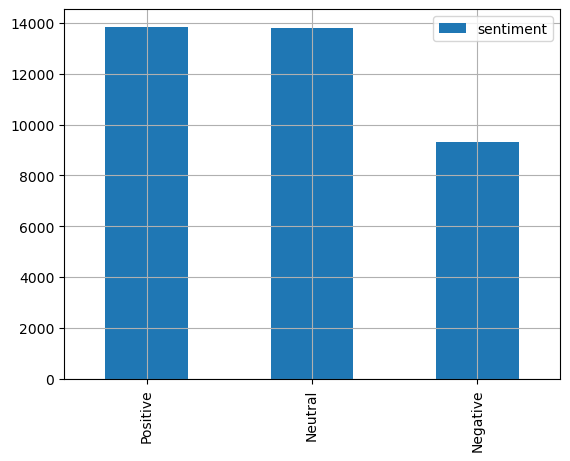

In [120]:
df1['sentiment'].value_counts().plot(kind='bar')
plt.legend()
plt.grid()

There are more Positive than Neutral while Negative is the lowest

<AxesSubplot:xlabel='sentiment', ylabel='count'>

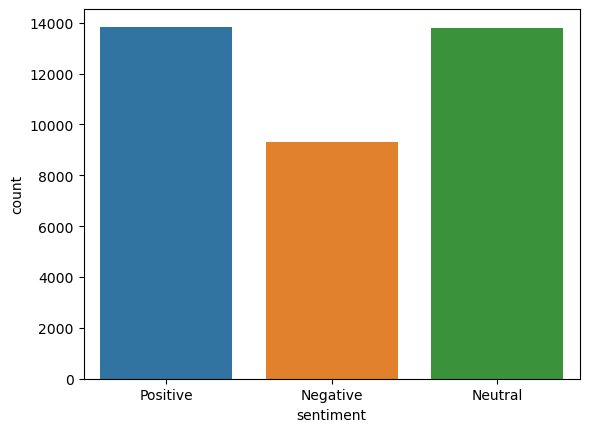

In [119]:
sns.countplot(df1['sentiment'])

# Keyword Extraction for Positive and Negative Tweet

In [74]:
positive_tweet = df1[df1['sentiment'] == 'Positive']['clean_tweet']

In [75]:
neutral_tweet = df1[df1['sentiment'] == 'Neutral']['clean_tweet']
negative_tweet = df1[df1['sentiment'] == 'Negative']['clean_tweet']

In [76]:
positive_tweet

3        //Blood on 1st slide\nIm joining the squidgame...
5        $THG\nGoing to explode to 4B Marketcap very so...
7        Please vote in my daily poll Thanks  Do you th...
16       Dunno what everyones going crazy about could o...
21                      couldnt resist sketching the loml 
                               ...                        
53992                                        Great Art by 
53995    Beware skit pretty much spoils the entirety of...
53998             was brilliant start to the very end Damn
54008    The RealLife Auto Strike Behind the Runaway Ne...
54024     violent contests take place in spaces designe...
Name: clean_tweet, Length: 13844, dtype: object

In [77]:
#remove stopwords and convert to tokens
positive_tweet_list = positive_tweet.apply(nfx.remove_stopwords).tolist()

In [78]:
negative_tweet_list = negative_tweet.apply(nfx.remove_stopwords).tolist()
neutral_tweet_list = neutral_tweet.apply(nfx.remove_stopwords).tolist()

In [79]:
positive_tweet_list

['//Blood 1st slide Im joining squidgame thing Im dead sugar honeycomb ofc',
 '$THG Going explode 4B Marketcap soon world MOBA game level',
 'vote daily poll Thanks think Donny van de Beek leave Manchester United Yes No…',
 'Dunno everyones going crazy email IMO Bring',
 'couldnt resist sketching loml',
 'talk people love🤣🤣 save mystery cause red light green light',
 'Season 2',
 'I’m thrilled Korea told 2002 day Korean music tv dominate gl…',
 'Illustration Im love',
 'Esp Tug War Episode brilliant writing screenplay',
 'watched episode Animal Kingdom S5 Netflix',
 'crying bathi bazobhatala🤣',
 'Watched week Midnight Mass definitely thing',
 'remarks Today betting men watch women Pleas…',
 'SQUIDGAME CHIBI YCH OPEN Unshaded £20 Shaded £35 species changes Number survive Feat…',
 'Kaizer Chiefs Orlando Pirates fans win Soweto derby 🧐',
 'course VIPs American sounding whites Smdh',
 'think old guy (001) organiser thing things pointed dire…',
 'Wi Hajoon good looking God dammit',
 'man ma

In [80]:
negative_tweet_list

['games players killed mask guys bloody night game killed o…',
 'discovered English audio 5 episodes Squid Game Korean subtitles Im watching foreign fi…',
 'struggle real',
 'Dalgona Candy Lover',
 'Ladies gentlemen Heres chibi art Kang Saebyeok Squid Game 🦑 love plus…',
 'track greatest success impact number',
 'im traumatized',
 'question colour guard outfits',
 'Different Shows Energy',
 'reminds job interviews',
 'Omg episode 6 heartbreaking',
 'ye survival fittest',
 'Dark thought acknowledged counter fact Ive willingly avoided sho…',
 'Joohoney pulled Monsta XRay tracksuit storage',
 'trending sad indictment tv/movie watching sophistication rotten tomato',
 'comenting laughable creating making tons capita…',
 'Got editing forgot far strict blockade 5 edits later…',
 'admit dont understand squid game rules game sounded complicated plus ha…',
 'maymay🤧',
 'Want watch know english 🤷\u200d',
 'regular glass tempered glass episode fucked',
 'People complaining promoting violence type 

# Tokenization

In [81]:
for line in positive_tweet_list:
    print(line)
    for token in line.split():
        print(token)

//Blood 1st slide Im joining squidgame thing Im dead sugar honeycomb ofc
//Blood
1st
slide
Im
joining
squidgame
thing
Im
dead
sugar
honeycomb
ofc
$THG Going explode 4B Marketcap soon world MOBA game level
$THG
Going
explode
4B
Marketcap
soon
world
MOBA
game
level
vote daily poll Thanks think Donny van de Beek leave Manchester United Yes No…
vote
daily
poll
Thanks
think
Donny
van
de
Beek
leave
Manchester
United
Yes
No…
Dunno everyones going crazy email IMO Bring
Dunno
everyones
going
crazy
email
IMO
Bring
couldnt resist sketching loml
couldnt
resist
sketching
loml
talk people love🤣🤣 save mystery cause red light green light
talk
people
love🤣🤣
save
mystery
cause
red
light
green
light
Season 2
Season
2
I’m thrilled Korea told 2002 day Korean music tv dominate gl…
I’m
thrilled
Korea
told
2002
day
Korean
music
tv
dominate
gl…
Illustration Im love
Illustration
Im
love
Esp Tug War Episode brilliant writing screenplay
Esp
Tug
War
Episode
brilliant
writing
screenplay
watched episode Animal Kingd

In [82]:
neutral_tweet_list

['— squid game (2021): deaths foreshadowing 🦑 // MAJOR SPOILERS cw blood gore',
 'saga continues data cheap Message',
 'naur shes purely cutielt333',
 'tug war game chained rope old man Missed time',
 'wait theres dub version watching reading subtitles 4 reason S…',
 'lets str3am fav idol songs apps premium INDONESIA 100% TRUSTED FAST RESP WA DI BIO',
 'Cyber security “experts” like: “I’m cyber security expert areas I’m not”',
 'Didnt mean push Squid Game Roblox',
 'unrealistic thing squid game phone battery lasted like week',
 'win game Challenge accepted',
 'gonna leave ‘seen’ kot',
 'Thank giving opportunity serve expertise trust',
 'watched episode',
 'overrated',
 'Masque Bar pass',
 'watch',
 'favs lt3',
 'parents finished sitting realising loved It’s time watching…',
 'watching Netflix It’s incredibly addictive',
 'squid game destroyed bad',
 '$NFLX shares soared 52% yesterday investors poured stock witnessing success',
 'you’re meeting approves 🦑',
 'haven’t finished',
 'look s

In [83]:
pos_tokens=[token for line in positive_tweet_list for token in line.split()]

In [84]:
neg_tokens=[token for line in negative_tweet_list for token in line.split()]
neut_tokens=[token for line in neutral_tweet_list for token in line.split()]

In [85]:
pos_tokens

['//Blood',
 '1st',
 'slide',
 'Im',
 'joining',
 'squidgame',
 'thing',
 'Im',
 'dead',
 'sugar',
 'honeycomb',
 'ofc',
 '$THG',
 'Going',
 'explode',
 '4B',
 'Marketcap',
 'soon',
 'world',
 'MOBA',
 'game',
 'level',
 'vote',
 'daily',
 'poll',
 'Thanks',
 'think',
 'Donny',
 'van',
 'de',
 'Beek',
 'leave',
 'Manchester',
 'United',
 'Yes',
 'No…',
 'Dunno',
 'everyones',
 'going',
 'crazy',
 'email',
 'IMO',
 'Bring',
 'couldnt',
 'resist',
 'sketching',
 'loml',
 'talk',
 'people',
 'love🤣🤣',
 'save',
 'mystery',
 'cause',
 'red',
 'light',
 'green',
 'light',
 'Season',
 '2',
 'I’m',
 'thrilled',
 'Korea',
 'told',
 '2002',
 'day',
 'Korean',
 'music',
 'tv',
 'dominate',
 'gl…',
 'Illustration',
 'Im',
 'love',
 'Esp',
 'Tug',
 'War',
 'Episode',
 'brilliant',
 'writing',
 'screenplay',
 'watched',
 'episode',
 'Animal',
 'Kingdom',
 'S5',
 'Netflix',
 'crying',
 'bathi',
 'bazobhatala🤣',
 'Watched',
 'week',
 'Midnight',
 'Mass',
 'definitely',
 'thing',
 'remarks',
 'Today',


In [86]:
#getting the most common keywords used 
from collections import Counter

In [123]:
def get_tokens(docx, num=30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result

In [124]:
get_tokens(pos_tokens)

{'Squid': 1346,
 'Game': 1129,
 'game': 969,
 'watching': 738,
 'episode': 719,
 'like': 670,
 'watch': 520,
 'squid': 427,
 'I’m': 415,
 'watched': 408,
 'finished': 397,
 'Im': 363,
 'series': 339,
 'know': 327,
 'good': 317,
 '6': 312,
 'think': 292,
 '2': 289,
 'people': 282,
 'time': 278,
 '🦑': 270,
 'Netflix': 268,
 'got': 268,
 'amp': 263,
 'Korean': 260,
 'games': 258,
 'man': 253,
 'play': 243,
 '1': 205,
 'season': 204}

In [89]:
most_common_pos_words = get_tokens(pos_tokens)
most_common_neg_words = get_tokens(neg_tokens)
most_common_neut_words = get_tokens(neut_tokens)

In [125]:
# plot with seaborn
neg_df1 = pd.DataFrame(most_common_neg_words.items(), columns=['words', 'count'])

In [126]:
neg_df1

,words,count
0,Squid,882
1,Game,750
2,game,707
3,episode,467
4,watching,451
5,like,447
6,watch,357
7,squid,301
8,watched,276
9,I’m,269


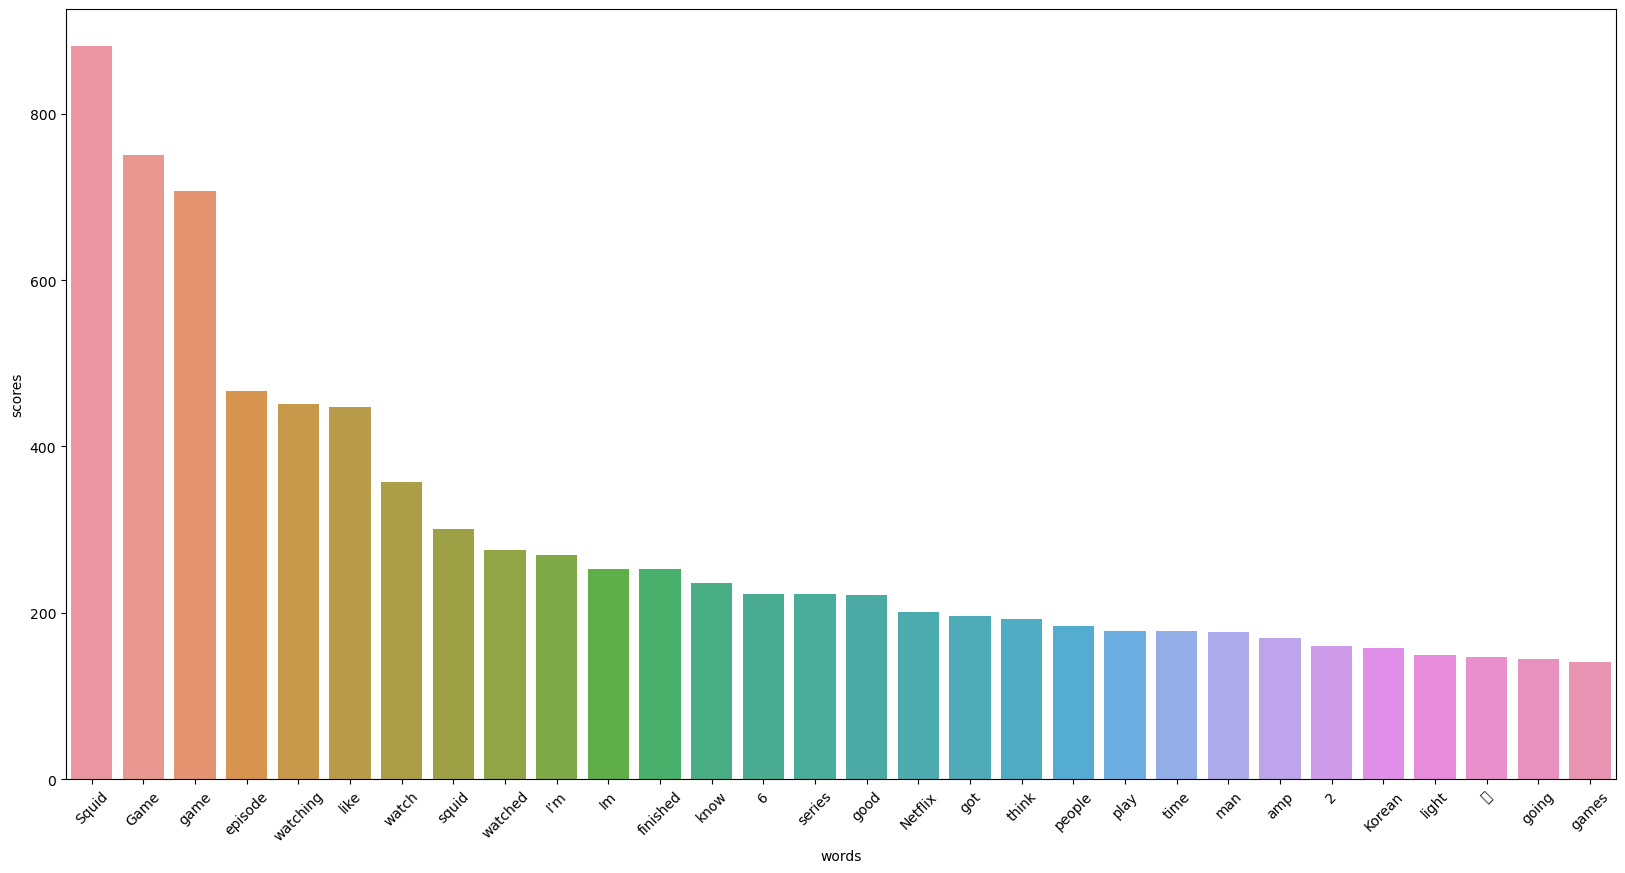

In [92]:
plt.figure(figsize=(20,10))
sns.barplot(x ='words', y='scores', data=neg_df1)
plt.xticks(rotation=45)
plt.show()

In [93]:
#for positive sentiment
pos_df1 = pd.DataFrame(most_common_pos_words.items(), columns=['words', 'scores'])

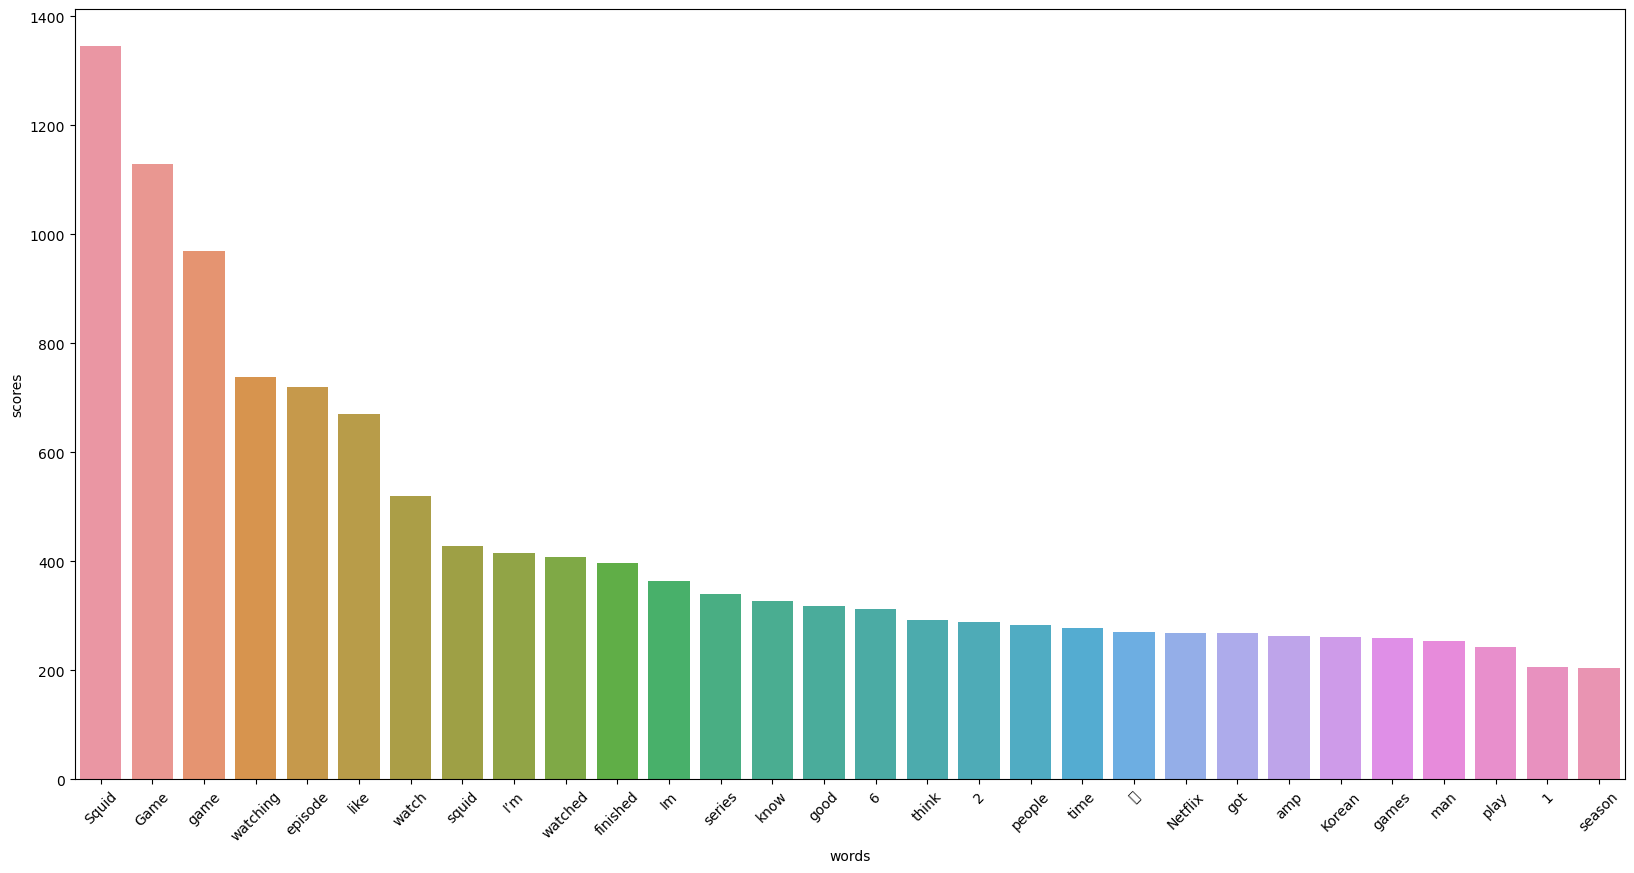

In [94]:
plt.figure(figsize=(20,10))
sns.barplot(x ='words', y='scores', data=pos_df1)
plt.xticks(rotation=45)
plt.show()

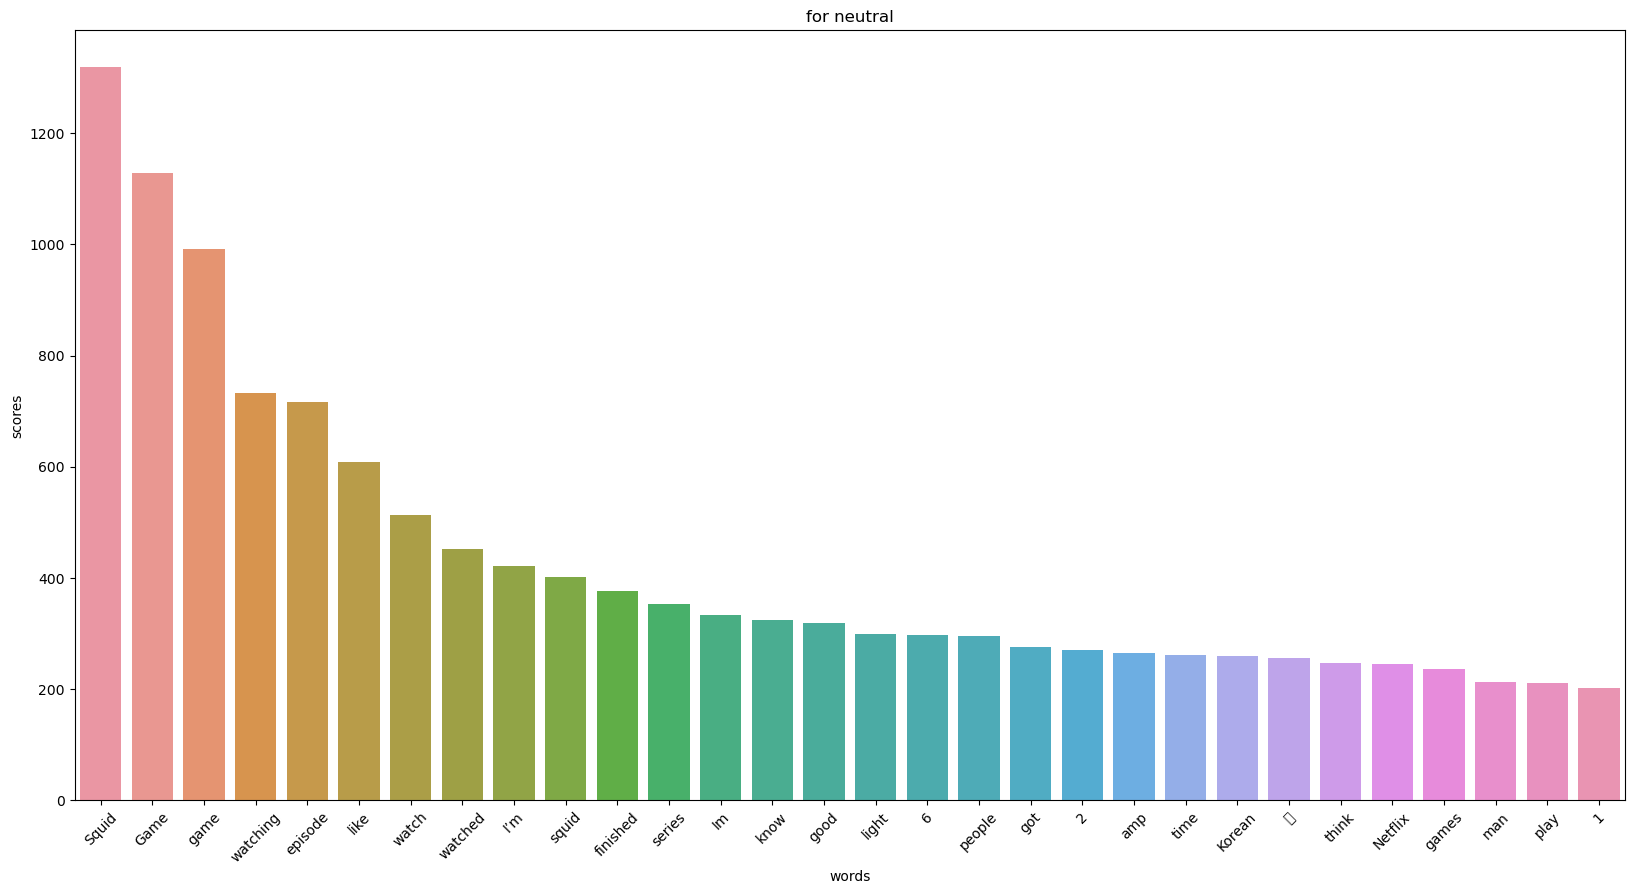

In [95]:
# for neutral
neut_df1 = pd.DataFrame(most_common_neut_words.items(), columns=['words', 'scores'])
plt.figure(figsize=(20,10))
sns.barplot(x ='words', y='scores', data=neut_df1)
plt.xticks(rotation=45)
plt.title("for neutral")
plt.show()

# Word Cloud

In [96]:
from wordcloud import WordCloud

In [97]:
def plot_wordcloud(docx):
    plt.figure(figsize=(10,5))
    mywordcloud = WordCloud().generate(docx)
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [98]:
pos_docx= ' '.join(pos_tokens)
neg_docx= ' '.join(neg_tokens)
neut_docx= ' '.join(neut_tokens)

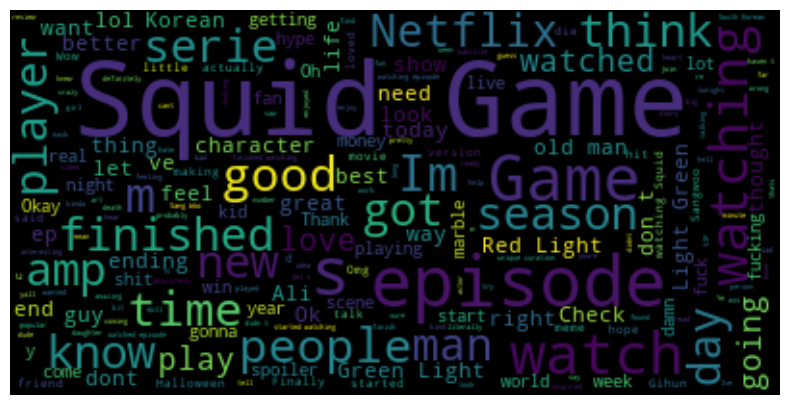

In [99]:
plot_wordcloud(pos_docx)

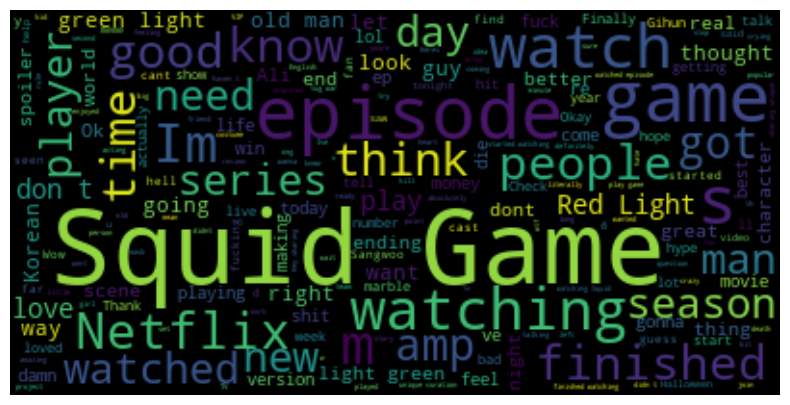

In [100]:
plot_wordcloud(neg_docx)

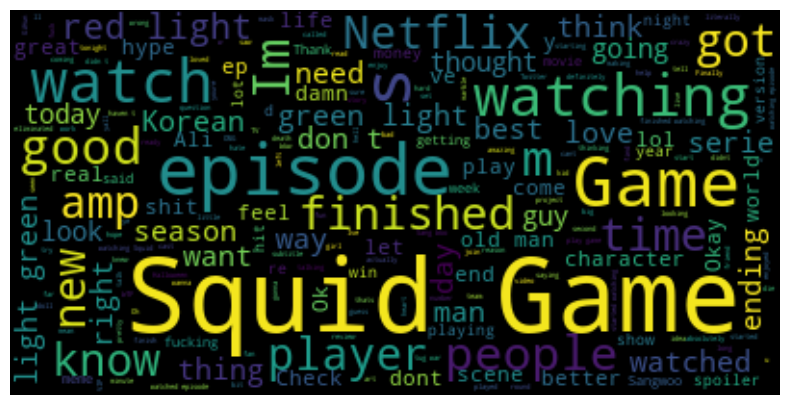

In [101]:
plot_wordcloud(neut_docx)

# About the Analysis

# Summary